# Compute, read and plot the result of the comparison between models and observation

## Data
- Infrared observations (spectrum) of a planetary atmosphere (XML format, Vitual Observatory)
- Models of a planetary atmosphere (generated by Exo-REM, Baudino et al. 2015, 2017, Charney et al. 2018)

## Description
Generate the $\chi^2$ between each model and the obseravation, then use the result to identify the area of the parameters which accurately reproduce the observation (i.e. give a value and uncertainties). 

### What is the $\chi2$?
$\chi^2 = \sum ( \frac{Obs-Synth}{Err_{Obs}} )^2 $

### Parameters
- the effective temperature, $T_{eff}[K]$, the temperature of the atmosphere if it were a blackbody 
- surface gravity, $log(g[cgs])$, the gravity at the pressure of 1 bar
- radius, the radius at the pressure of 1 bar
- metallicity, $z = log(Z/Z_{Sun})$, the amount of heavier element than H and He in the atmopshere, relative to the Sun ($z_{Sun}=0$)
- mass, computed using radius and gravity

## Librairies

In [1]:
import astropy.io.votable.tree as vo
from astropy.table import Table, hstack
from astropy import constants as cst
import numpy as np

## Local library

In [2]:
from Tools import *
from pipeline import *

## Generate the data
The program reads "input_data.json"

In [3]:
UseExoREM()

###########################################
##Begining of the pipeline
###########################################
###########################################
##Reading param file
###########################################
###########################################
##Reading obs file and list of models
###########################################
###########################################
##Reading obs spectrum
###########################################
###########################################
##Reading filters
###########################################
###########################################
##Building transmission filter
###########################################
###########################################
##Adding Spectra in one array
###########################################
###########################################
##Applying filters on models
###########################################
###########################################
##Comparing models and spectrum
###

## Input parameters

In [4]:
#########
#Criteria
#########
#
radiusminmax=np.array([0.6,1.5])*cst.R_jup.value
massminmax=np.array([5,20])*cst.M_jup.value
sig=0.96
NbDegreeFree= 44 #44 5
#
########
'''
'''
# hr8799 e
#--------- definition parametres planete
R=1.*cst.R_jup.value #m 1*Rjup
Distance=10.0*3.086e16  # m, 10.0 pc
FitType=["Full"] #Full, SED, Spec
dir_input=["output/"]
dir_output=["output/"]
planetName=['hr8799e']
datafile=dir_input[0]+planetName[0]+"_SPHERE_"+FitType[0]+".xml"
typeCloud='0003new'#'nocloud'

ER_input="input/grids/cloud/"

colors_planets=[[1., 0., 0.]]

## Combine parameters to be used

In [5]:
######################### Combining datasets
param=[]
fit=[]
spec=[]

for p in range(len(FitType)):
    for m in range(len(dir_input)):
        param.append(Table.read(dir_output[m]+"FitFinal"+FitType[p]+"_"+typeCloud+"_"+planetName[0]+".xml", table_id="parameters"))
        fit.append(Table.read(dir_output[m]+"FitFinal"+FitType[p]+"_"+typeCloud+"_"+planetName[0]+".xml", table_id="fit"))
        spec.append(Table.read(dir_output[m]+"FitFinal"+FitType[p]+"_"+typeCloud+"_"+planetName[0]+".xml", table_id="spectre"))

paramJup=[]
for p in range(len(FitType)):
    for m in range(len(dir_input)):
        paramJup.append(hstack([param[p+m]["gravity","Teff","metalicity"],fit[p+m]["radius","mass","chi2final"]]))

######################### -------------------

## Plot map of $\chi^2$ relative to temperature and surface gravity, each map with a given metallicity 

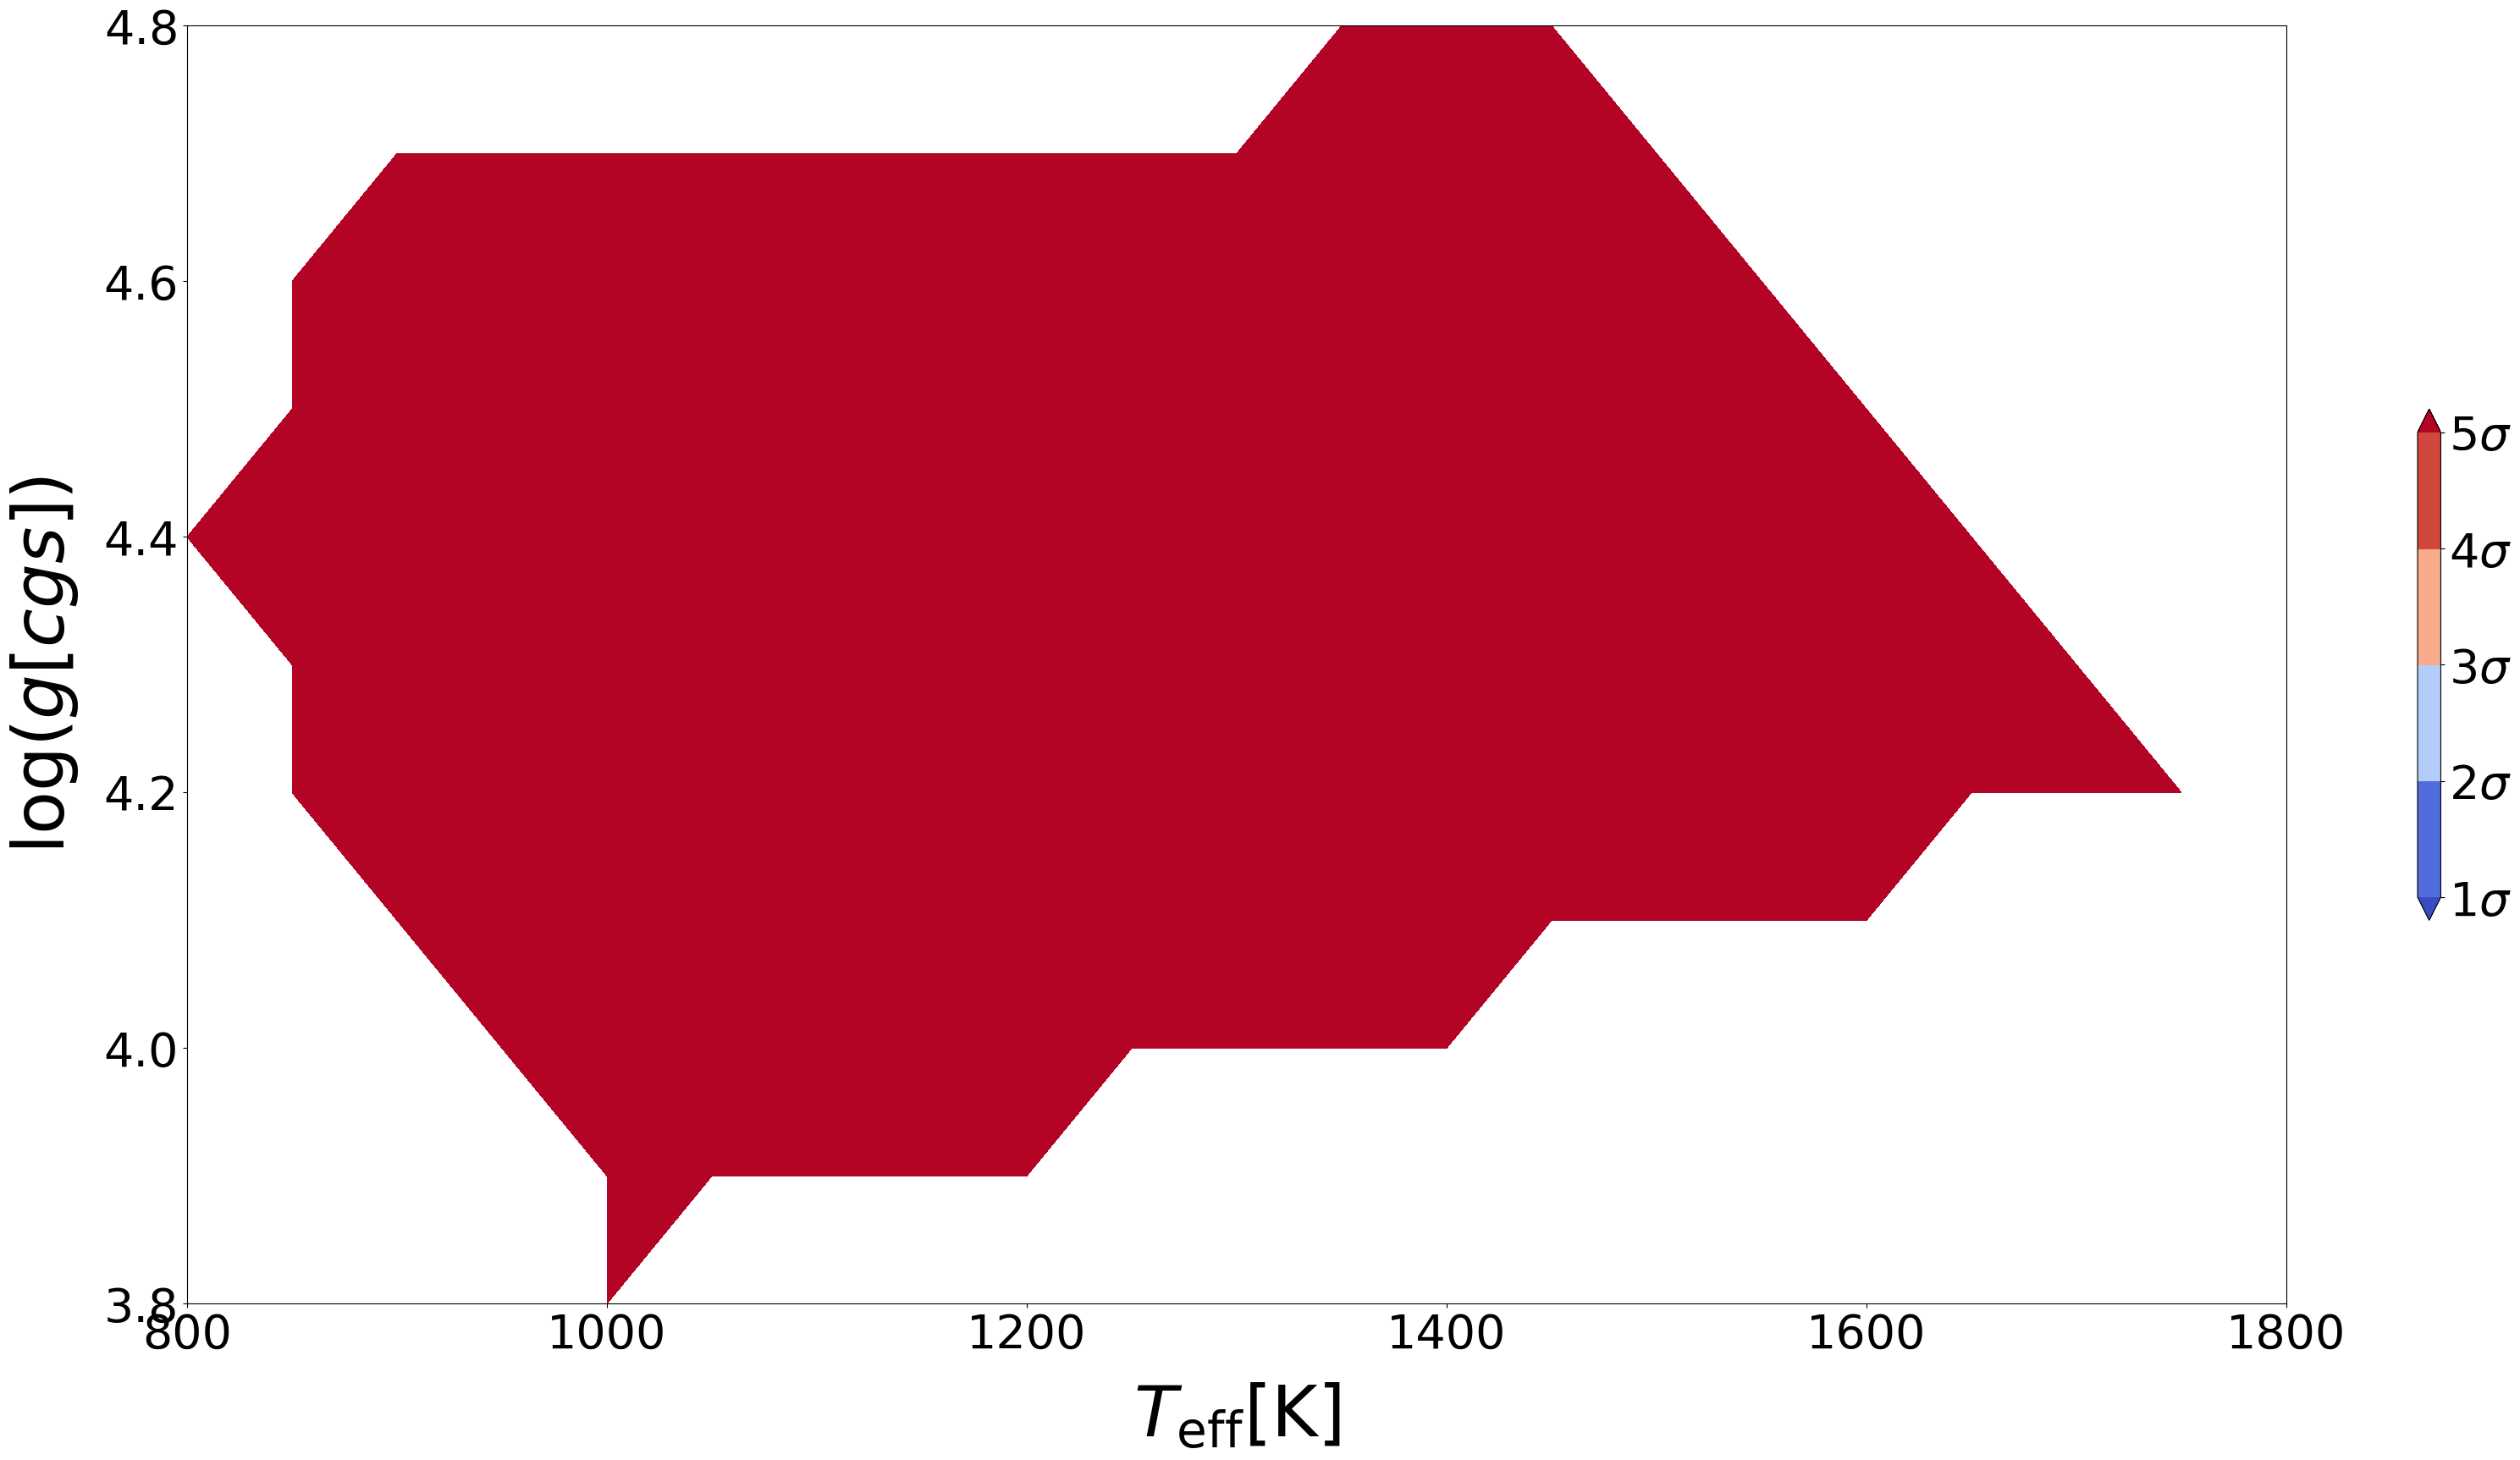

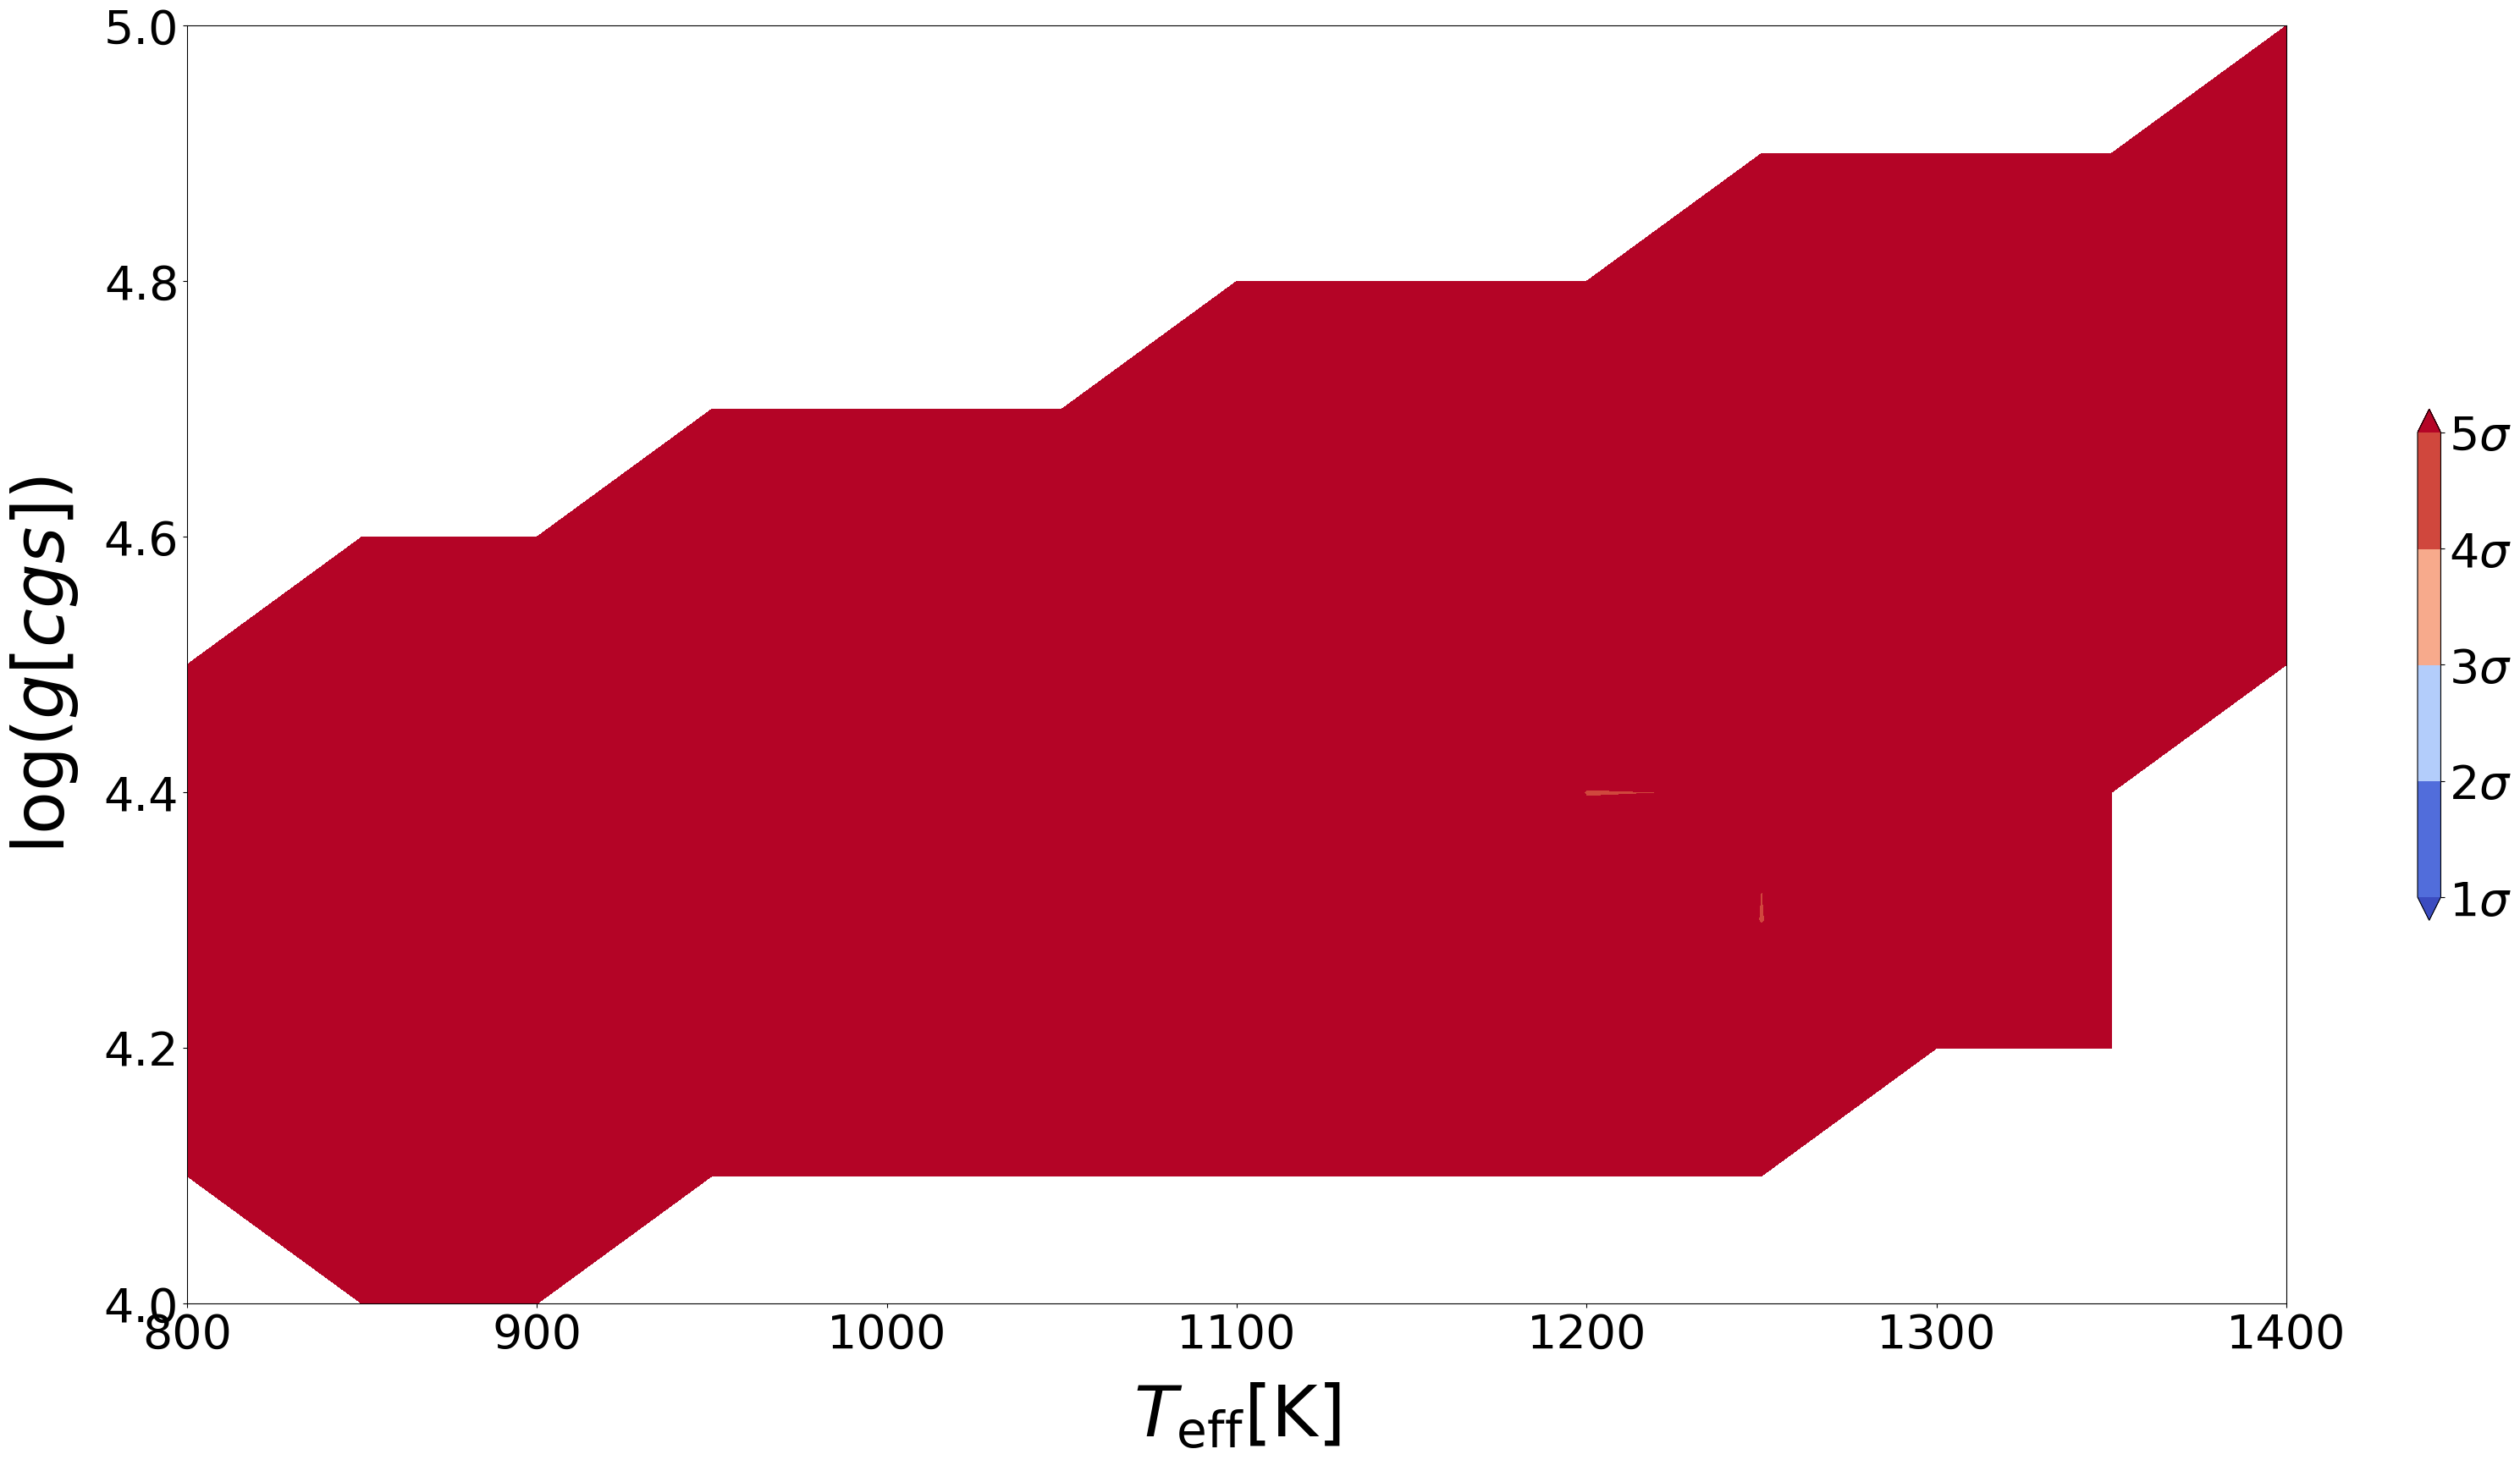

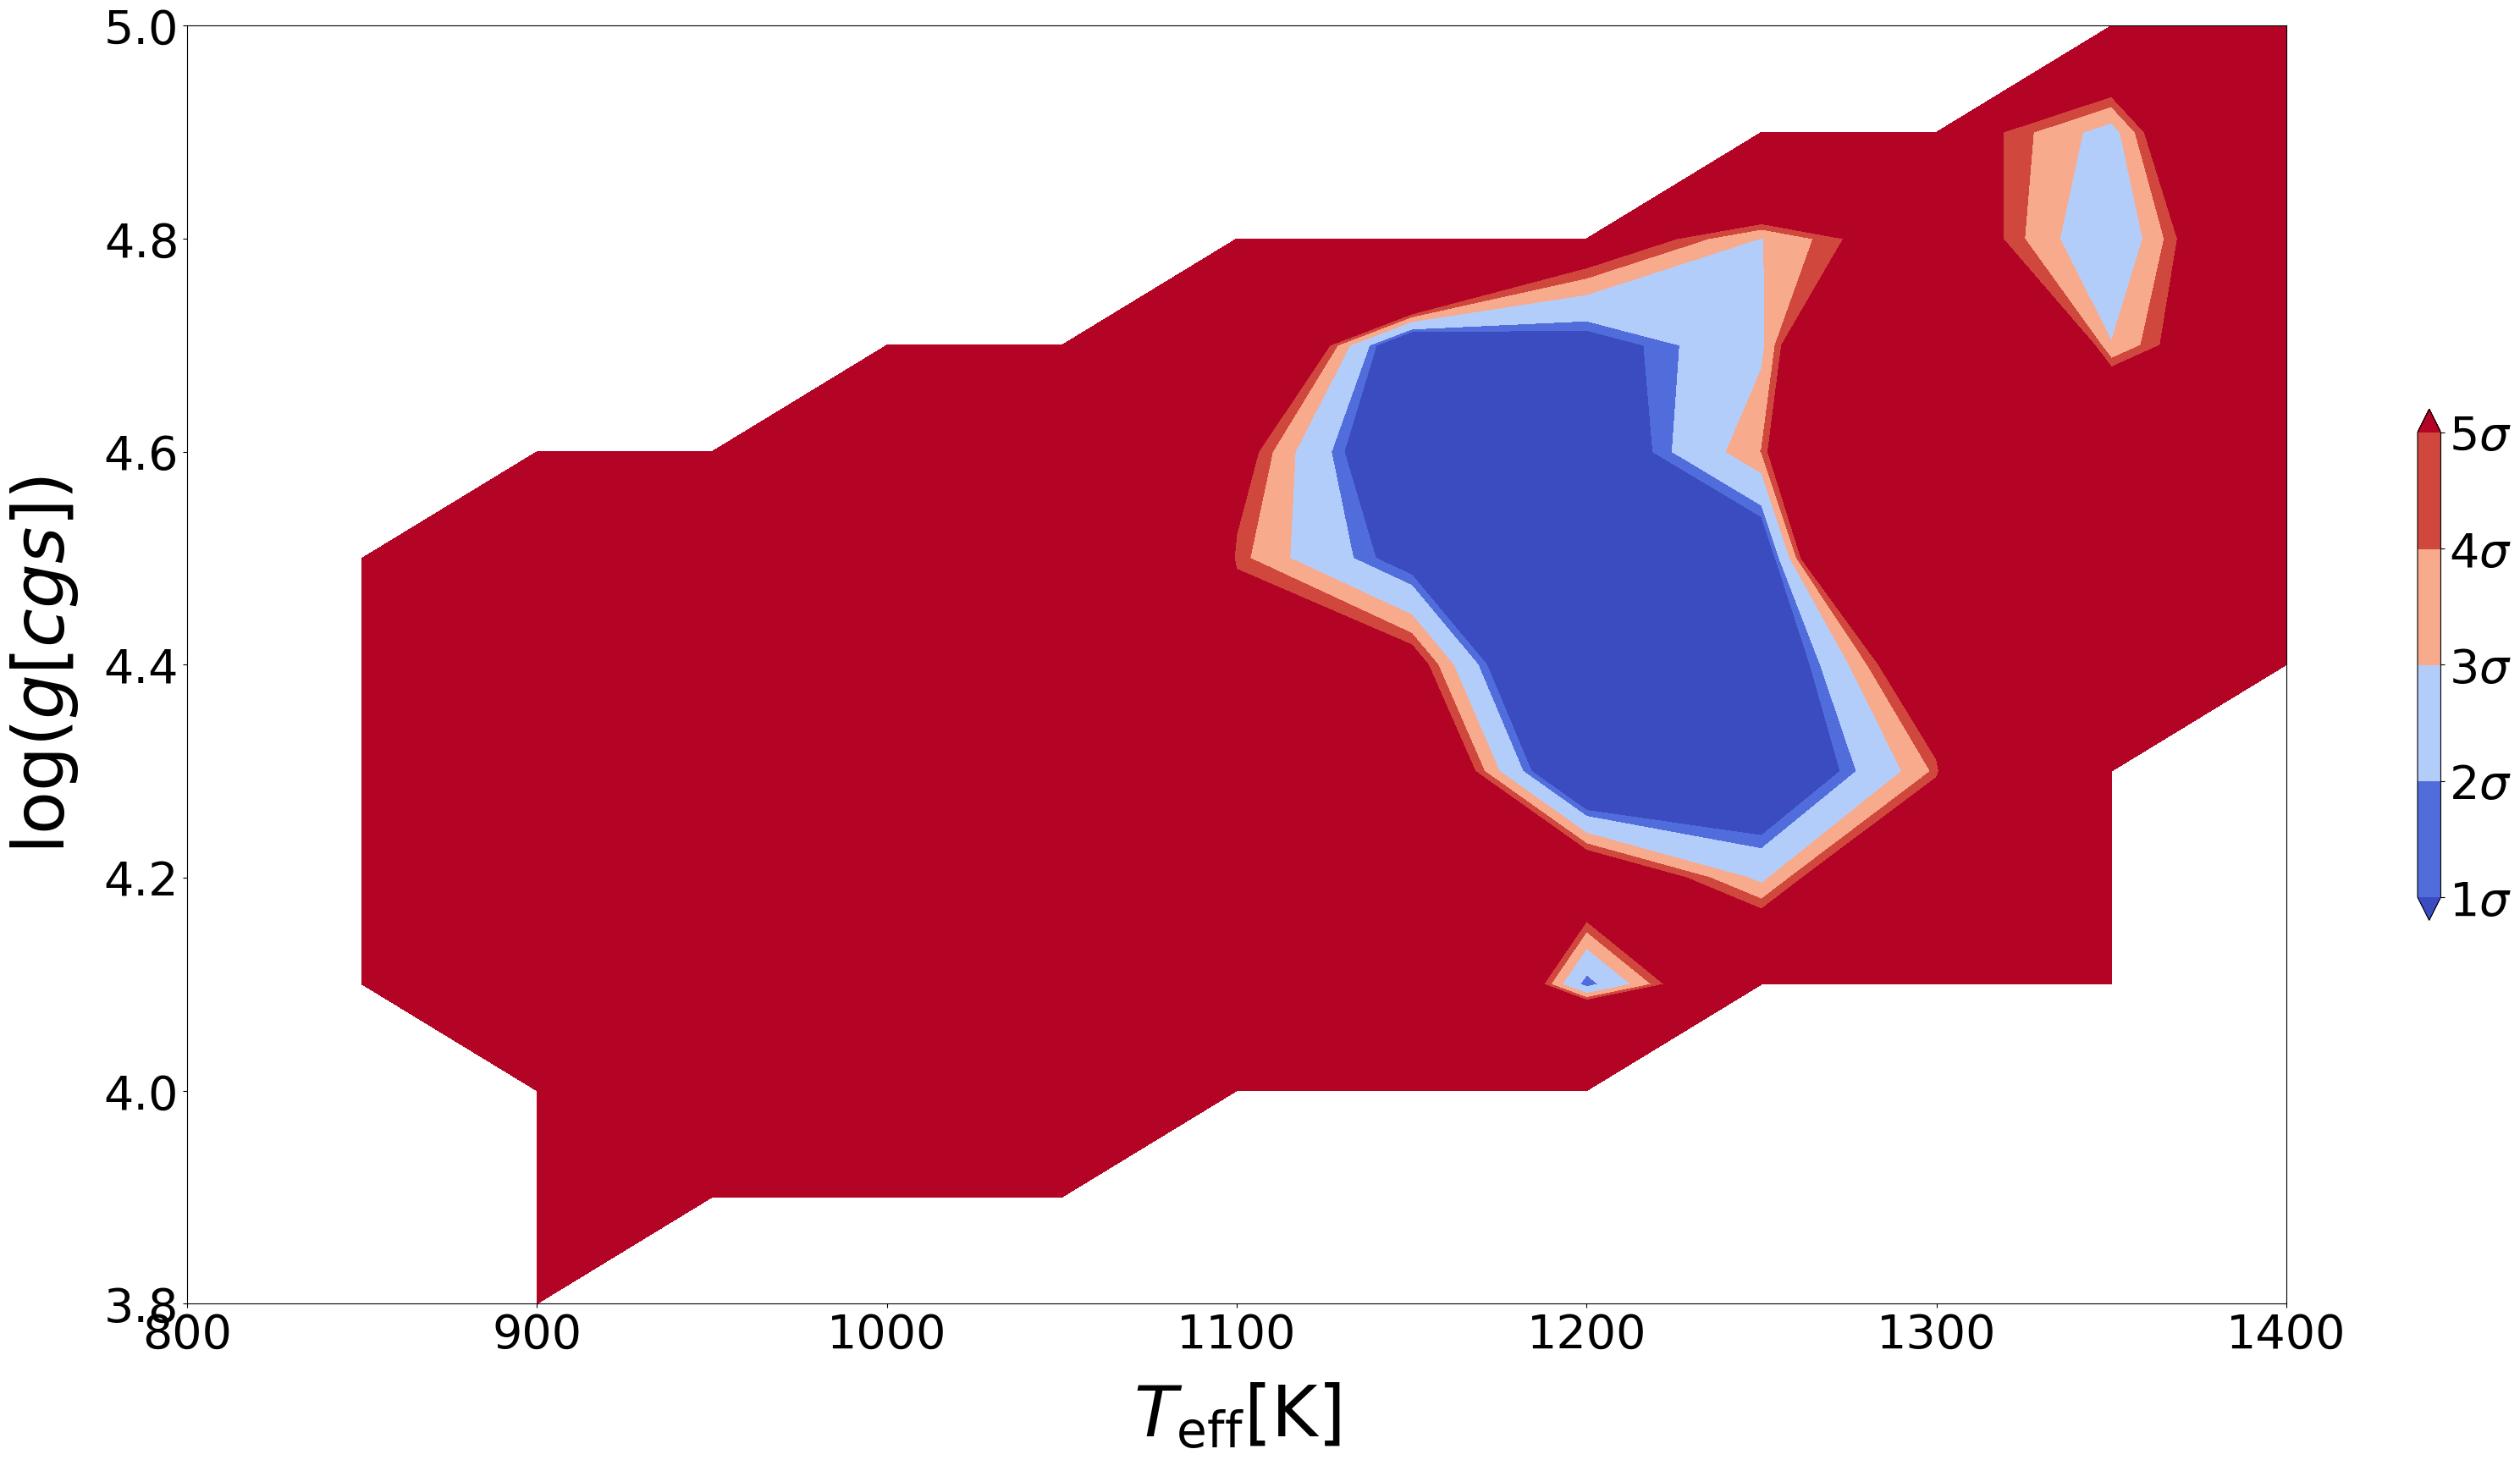

()

In [6]:
plotGrid(Table.read(dir_output[0]+"FitFinal"+FitType[0]+"_"+typeCloud+"_"+planetName[0]+".xml", table_id="parameters"),
        Table.read(dir_output[0]+"FitFinal"+FitType[0]+"_"+typeCloud+"_"+planetName[0]+".xml", table_id="fit"),
        dir_output,
        radiusminmax, massminmax,
        NbDegreeFree,FitType,typeCloud,planetName
        )

## Plot histogram of each parameter with a weigth relative to the $\chi^2$

1039 +- 500.0
4 +- 0.5
1 +- 1.0


gravity,Teff,metalicity,radius,mass,chi2final
cm / s2,K,,m,kg,
float64,float64,float64,float64,float64,float64
6309.572749999998,1000.0,0.316227764,103925860.18679526,1.0355505731236384e+28,235.13264927732467
7943.284179999997,950.0,0.316227764,103962440.09007405,1.3045992790993765e+28,225.23687113882278
7943.284179999997,1000.0,0.316227764,101790581.7734136,1.2506603998571297e+28,258.5457030581564
10000.0,900.0,0.316227764,100430402.44833301,1.5326906624848317e+28,308.8052805722284
10000.0,950.0,0.316227764,94823226.91355005,1.3663235906277283e+28,299.86819275911864
12589.252000000004,950.0,0.316227764,83619008.89891966,1.3376240356272765e+28,377.83182600630073
12589.252000000004,1000.0,0.316227764,87207882.08002254,1.4549079308897697e+28,338.39431569722205
12589.252000000004,1050.0,0.316227764,73302303.44706321,1.027919906692486e+28,376.4798437013447


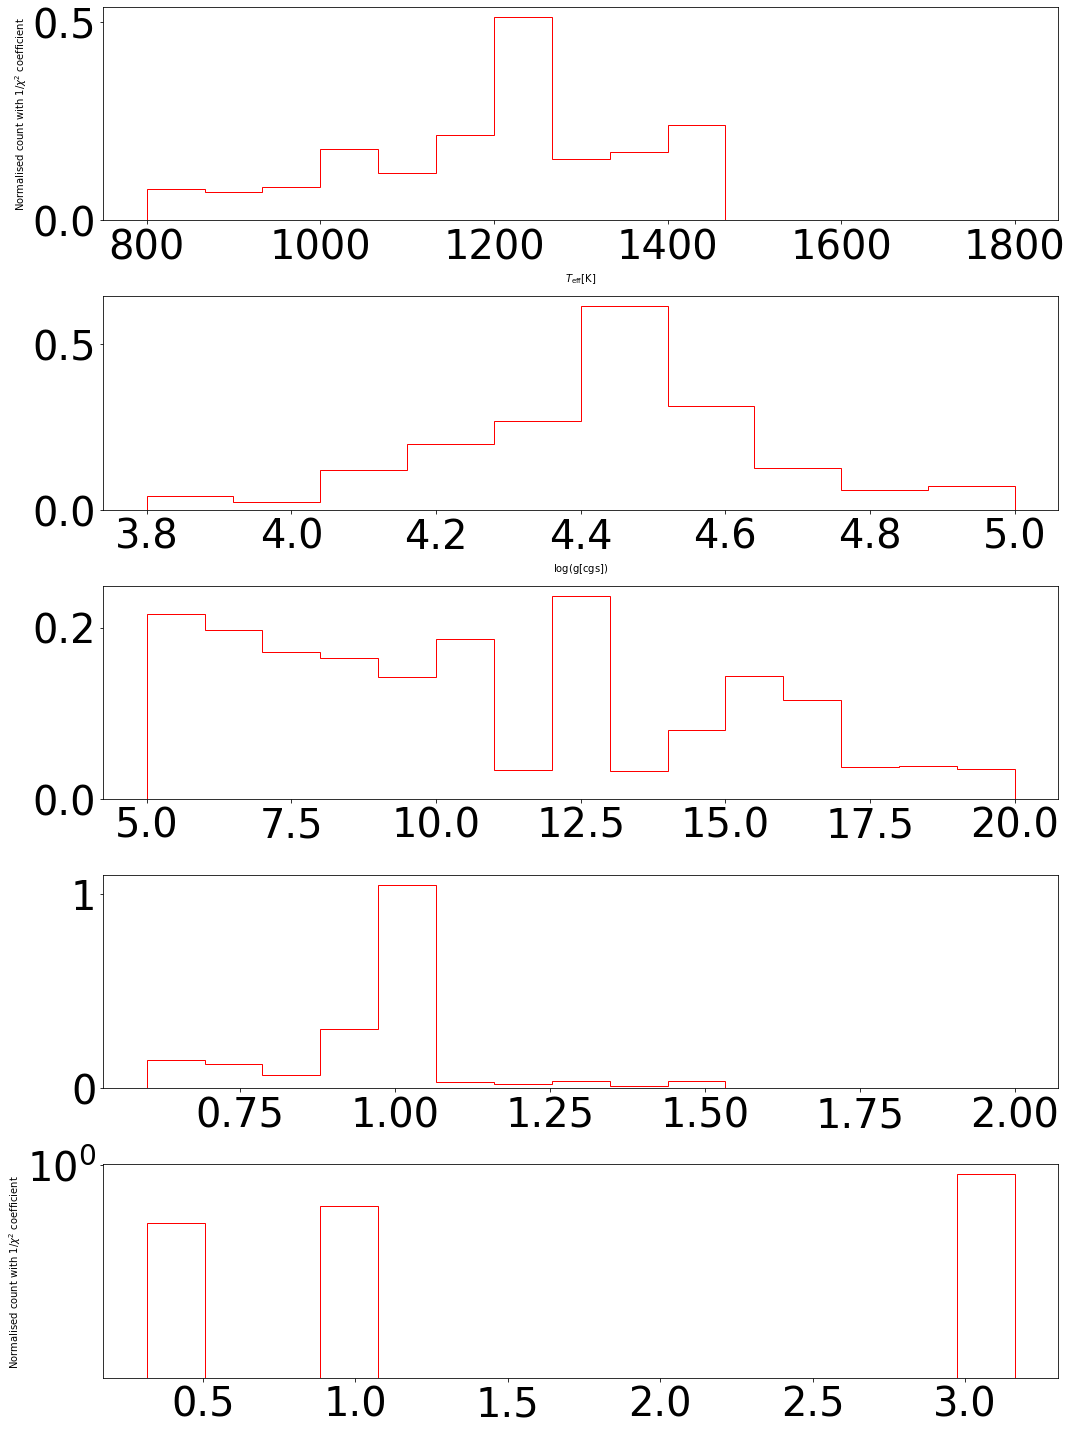

In [7]:
plotHisto(["hr8799e"], ["Cld"], paramJup, param, sig, radiusminmax, massminmax,
        dir_output, planetName,
        ER_input, NbDegreeFree,
        colors_planets, FitType,typeCloud,planetName,option=["y","y","y","y","y"])